In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [2]:
df = pd.read_csv('Invistico_Airline.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
satisfaction                         129880 non-null object
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64
Ease of Online booking               129880 non-null int64

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df['Age'] = df['Age'].astype('int64')
df['Flight Distance'] = df['Flight Distance'].astype('int64')
df['Seat comfort'] = df['Seat comfort'].astype(str).str.strip().astype('category')
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].astype(str).str.strip().astype('category')
df['Food and drink'] = df['Food and drink'].astype(str).str.strip().astype('category')
df['Gate location'] = df['Gate location'].astype(str).str.strip().astype('category')
df['Inflight wifi service'] = df['Inflight wifi service'].astype(str).str.strip().astype('category')
df['Inflight entertainment'] = df['Inflight entertainment'].astype(str).str.strip().astype('category')
df['Online support'] = df['Online support'].astype(str).str.strip().astype('category')
df['Ease of Online booking'] = df['Ease of Online booking'].astype(str).str.strip().astype('category')
df['On-board service'] = df['On-board service'].astype(str).str.strip().astype('category')
df['Leg room service'] = df['Leg room service'].astype(str).str.strip().astype('category')
df['Baggage handling'] = df['Baggage handling'].astype(str).str.strip().astype('category')
df['Checkin service'] = df['Checkin service'].astype(str).str.strip().astype('category')
df['Cleanliness'] = df['Cleanliness'].astype(str).str.strip().astype('category')
df['Online boarding'] = df['Online boarding'].astype(str).str.strip().astype('category')
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('int64')
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('float64')


df['satisfaction'] = df['satisfaction'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Customer Type'] = df['Customer Type'].astype('category')
df['Type of Travel'] = df['Type of Travel'].astype('category')
df['Class'] = df['Class'].astype('category')


In [4]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Preview of data:


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
satisfaction                         129880 non-null category
Gender                               129880 non-null category
Customer Type                        129880 non-null category
Age                                  129880 non-null int64
Type of Travel                       129880 non-null category
Class                                129880 non-null category
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null category
Departure/Arrival time convenient    129880 non-null category
Food and drink                       129880 non-null category
Gate location                        129880 non-null category
Inflight wifi service                129880 non-null category
Inflight entertainment               129880 non-null category
Online

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,...,5,5,4,4,5,3,4,5,24,NaN


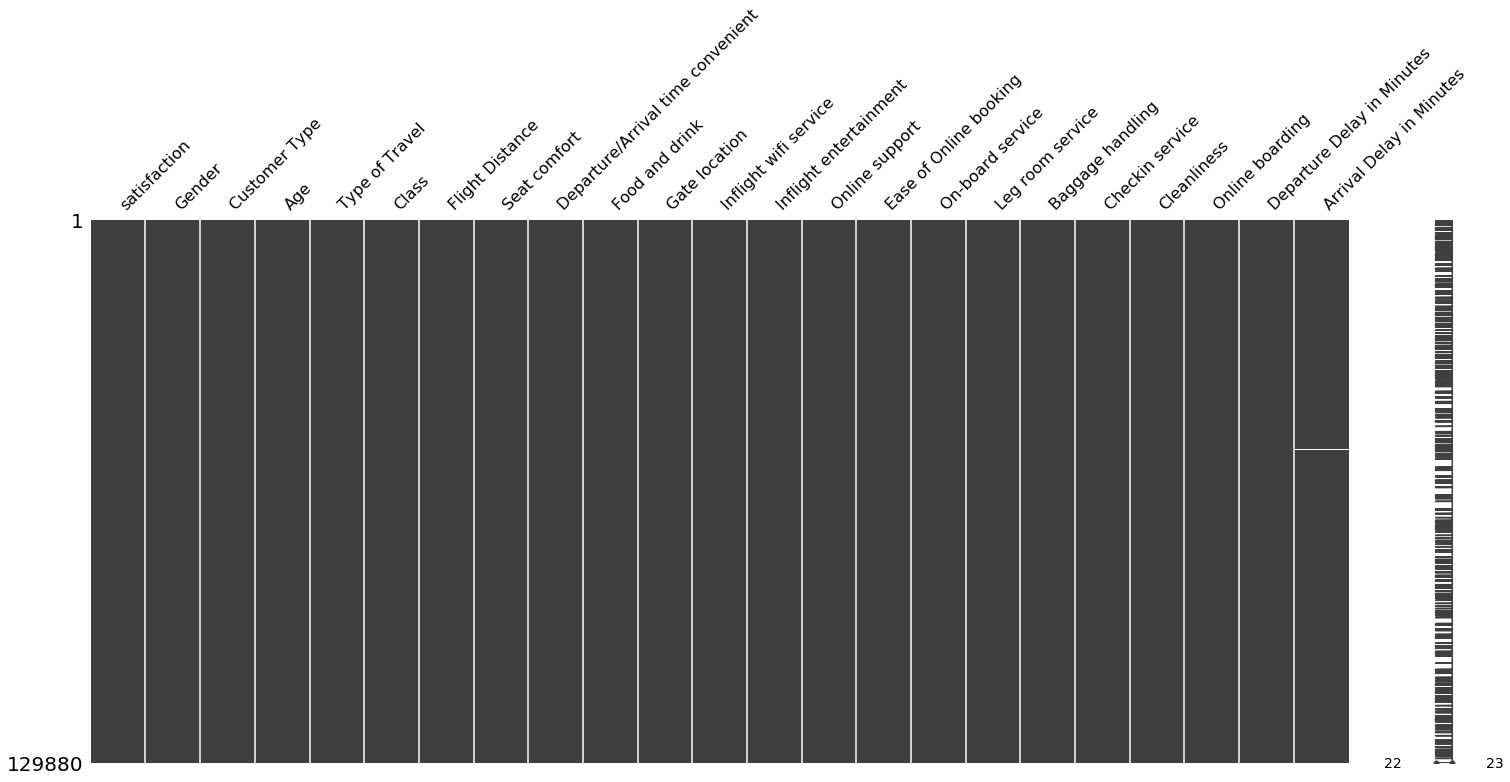


No duplicated entries found

To check: 
Unique count of non-numeric data

satisfaction                         2
Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Seat comfort                         6
Departure/Arrival time convenient    6
Food and drink                       6
Gate location                        6
Inflight wifi service                6
Inflight entertainment               6
Online support                       6
Ease of Online booking               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Cleanliness                          6
Online boarding                      6
dtype: int64
Top 5 unique values of satisfaction
   satisfaction  Count
0     satisfied  71087
1  dissatisfied  58793
 
Top 5 unique values of Gender
   Gender  Count
0  Female  65899


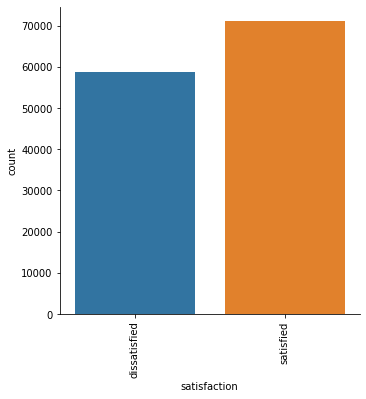

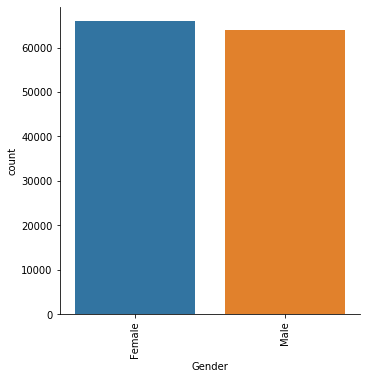

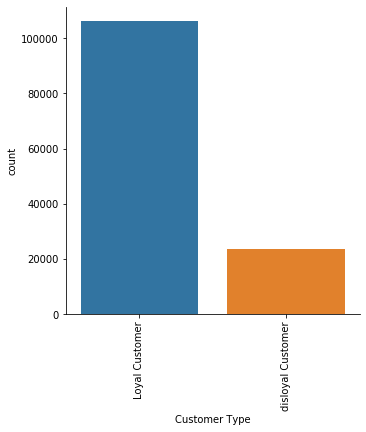

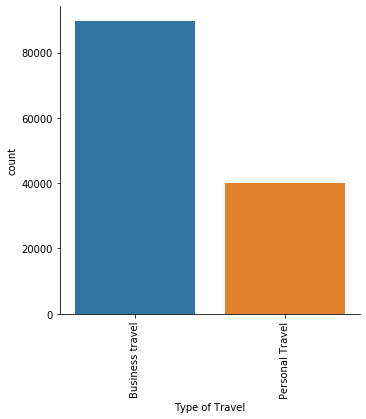

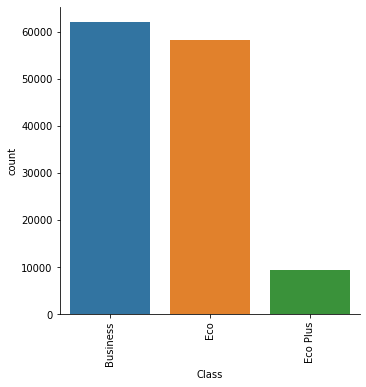

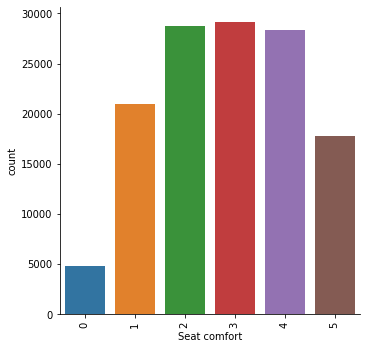

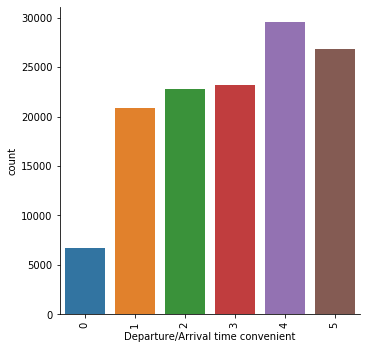

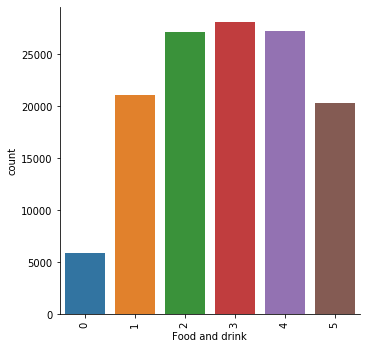

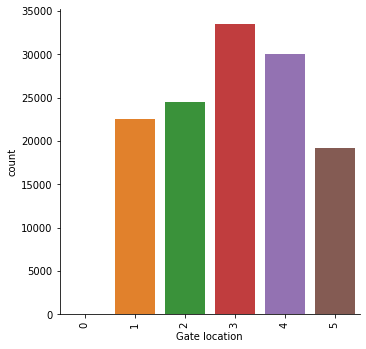

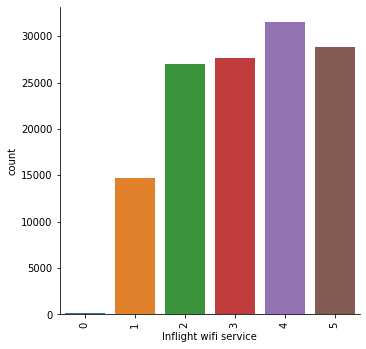

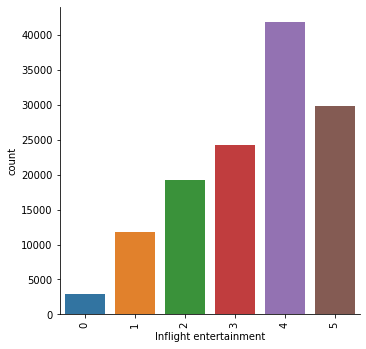

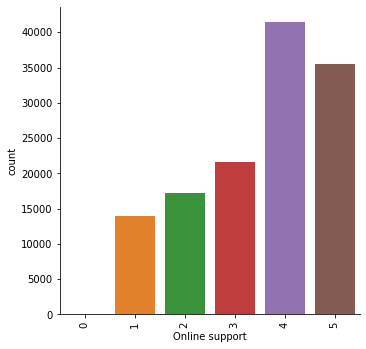

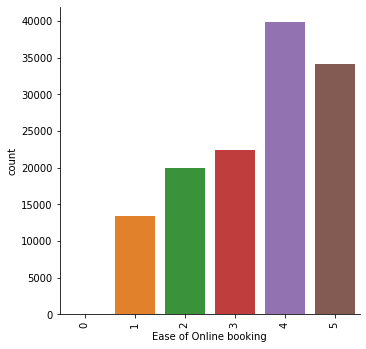

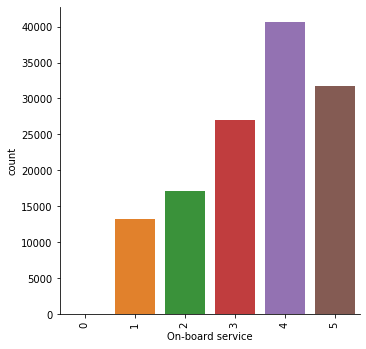

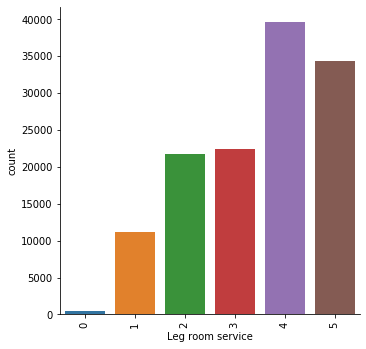

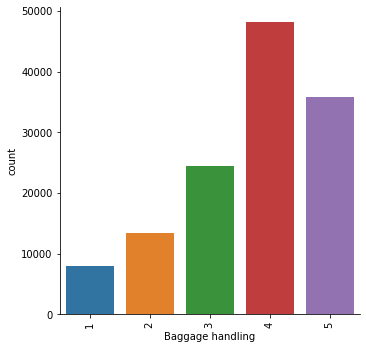

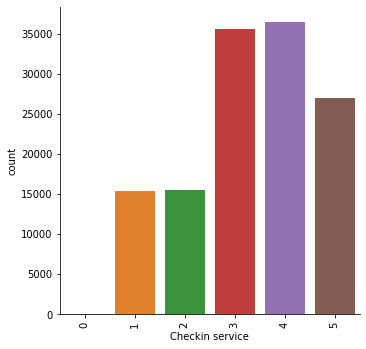

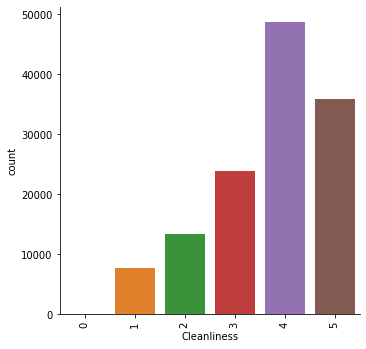

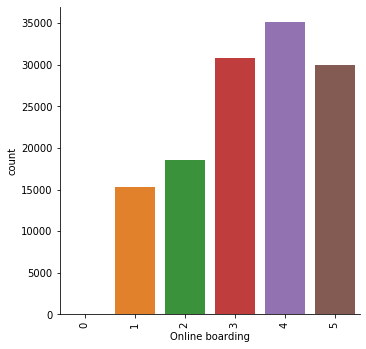


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Departure Delay in Minutes,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0


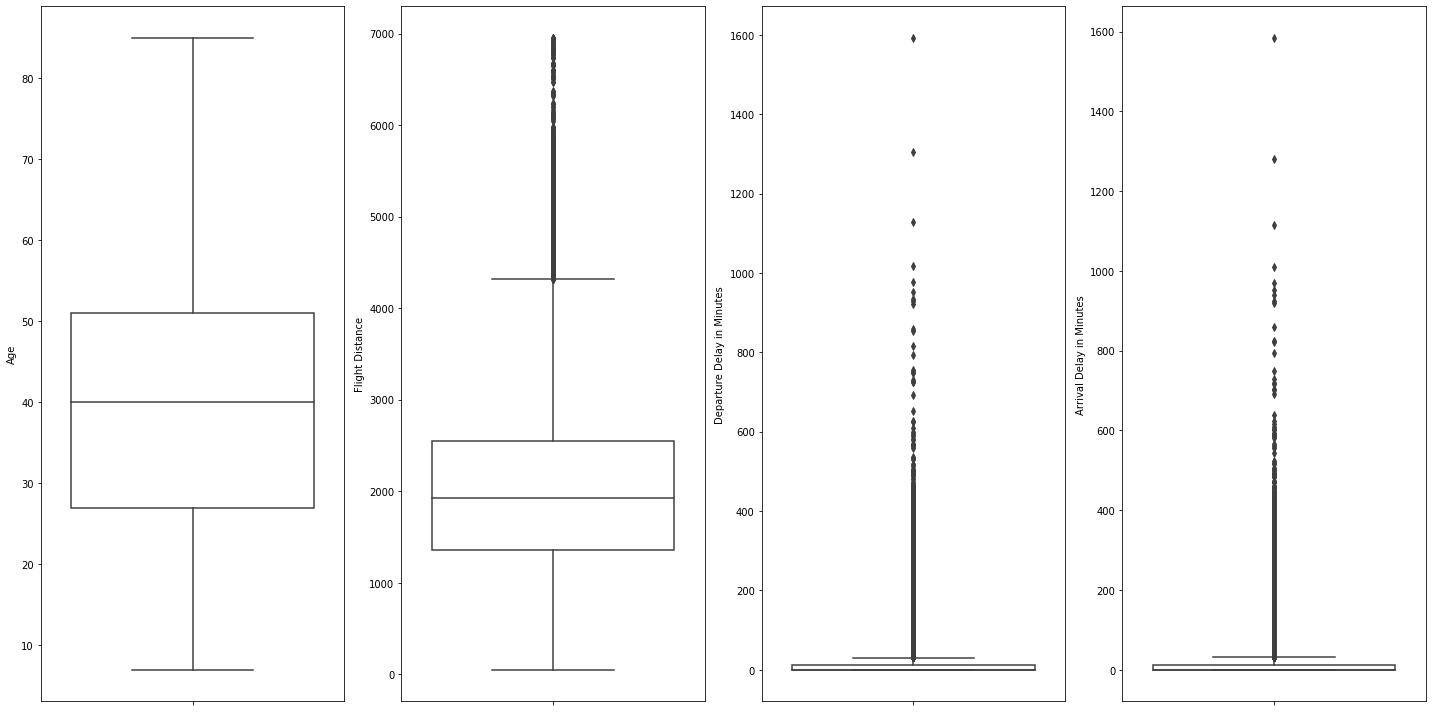

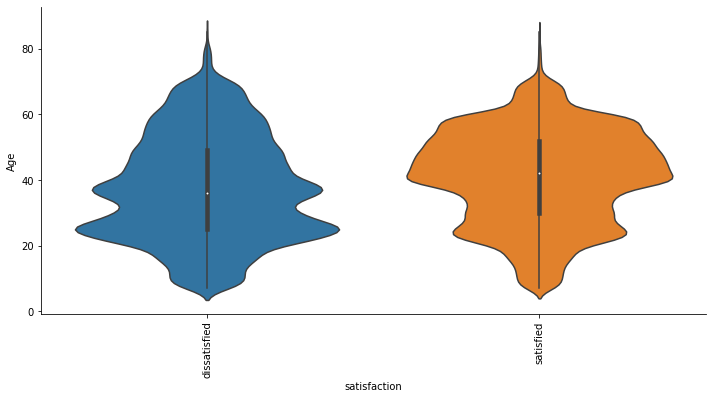

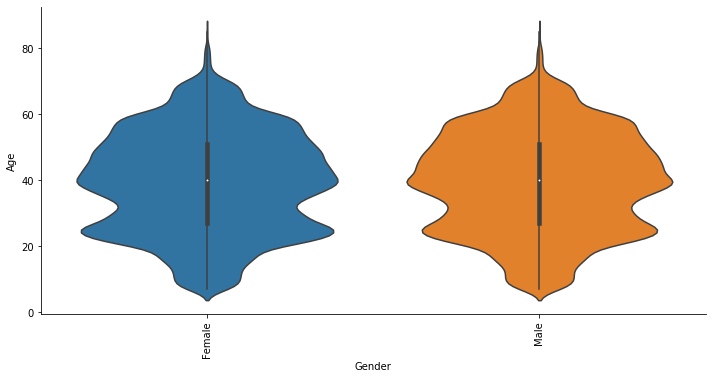

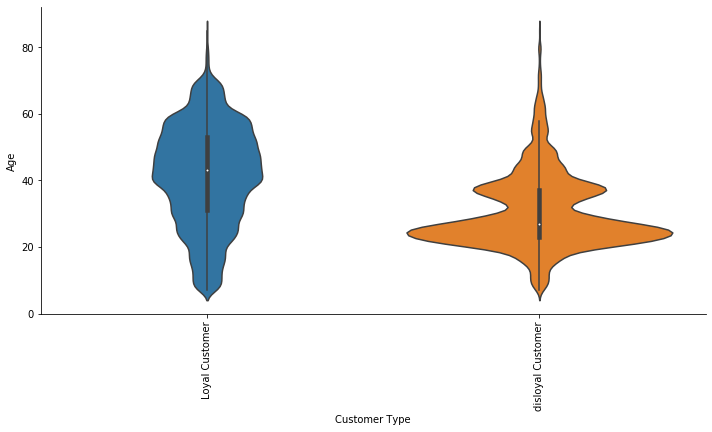

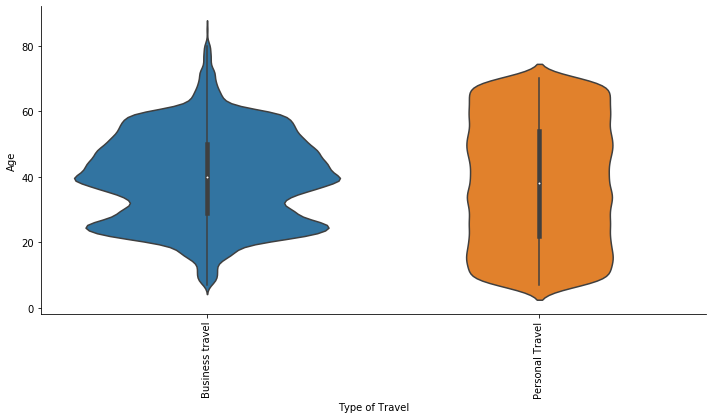

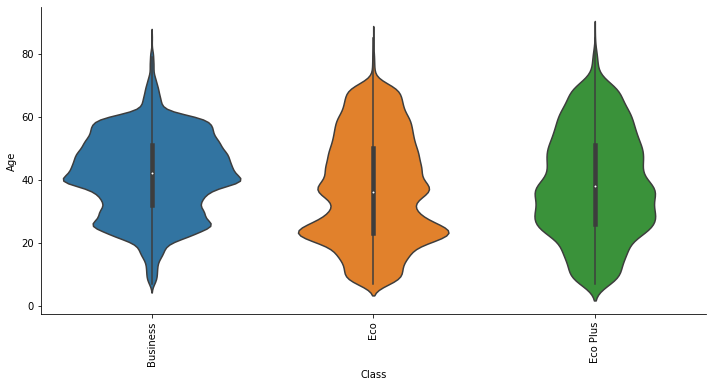

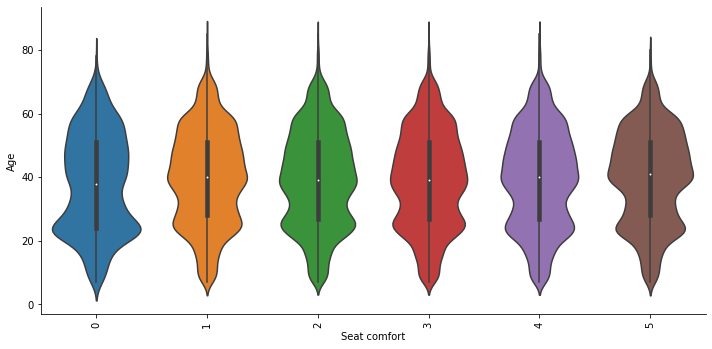

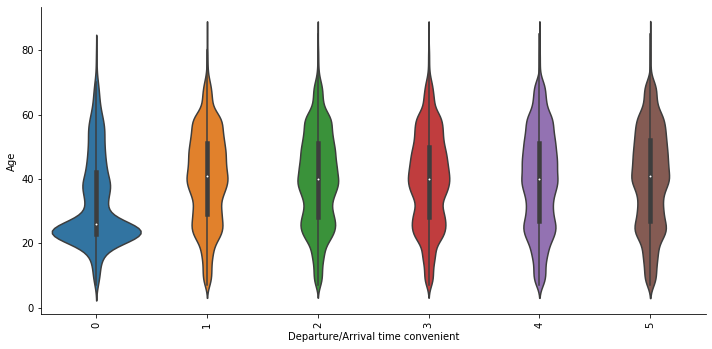

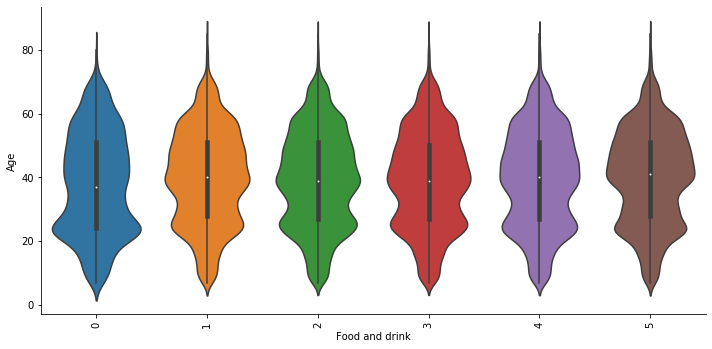

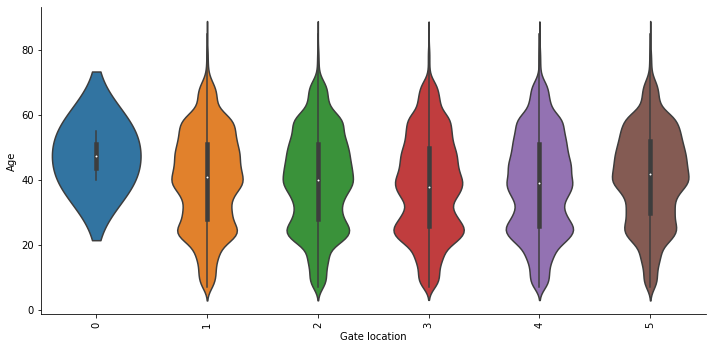

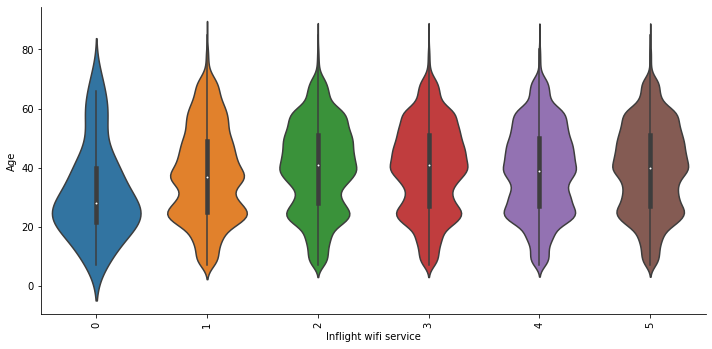

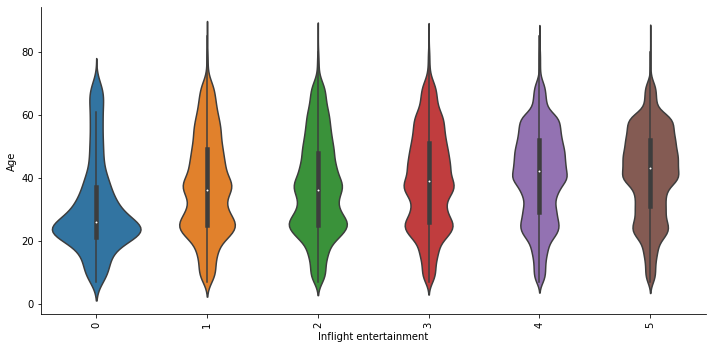

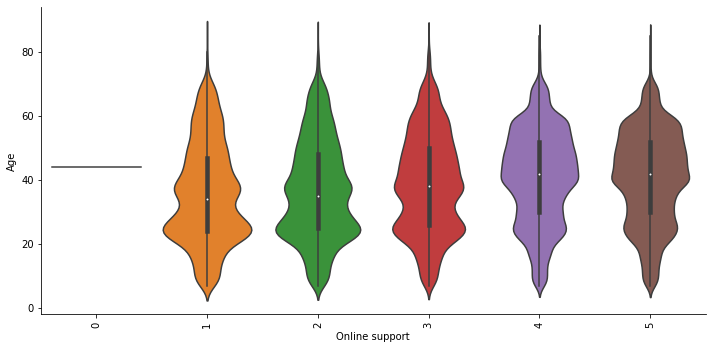

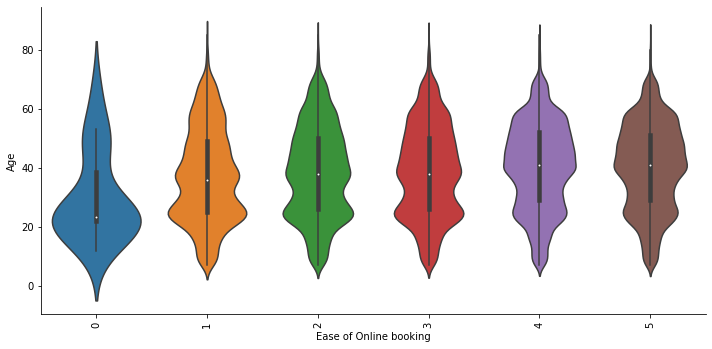

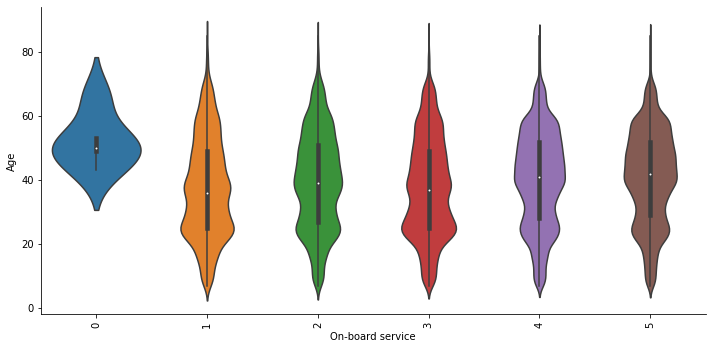

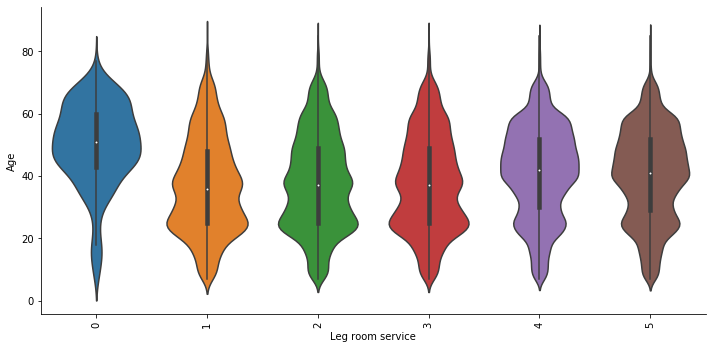

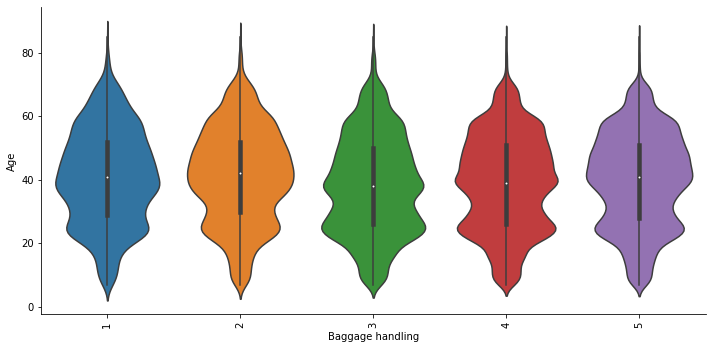

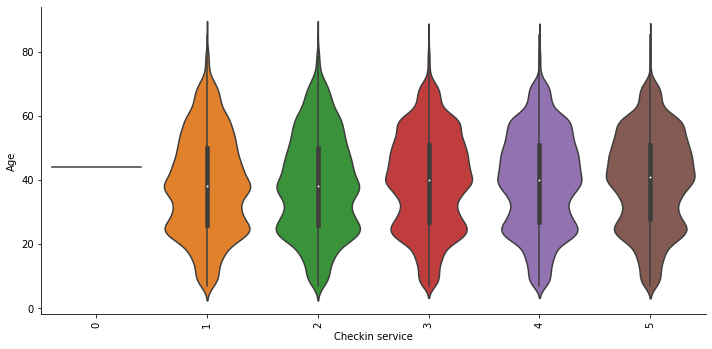

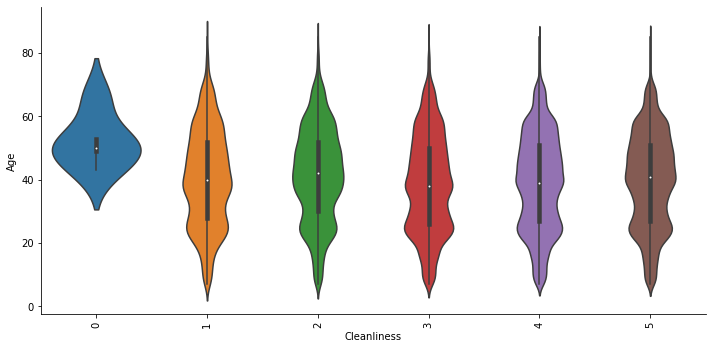

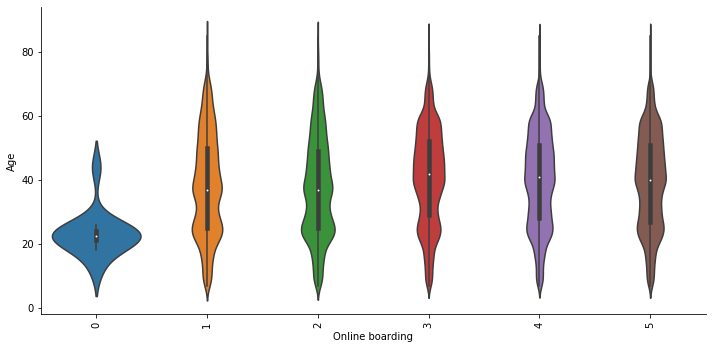

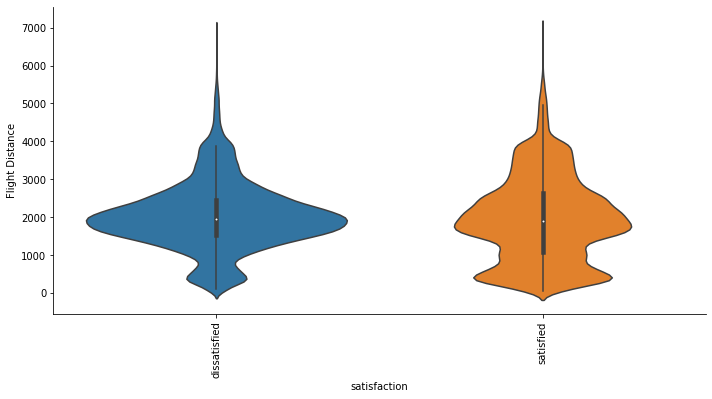

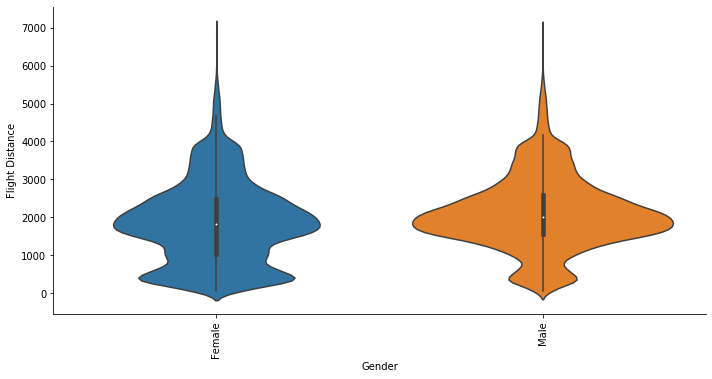

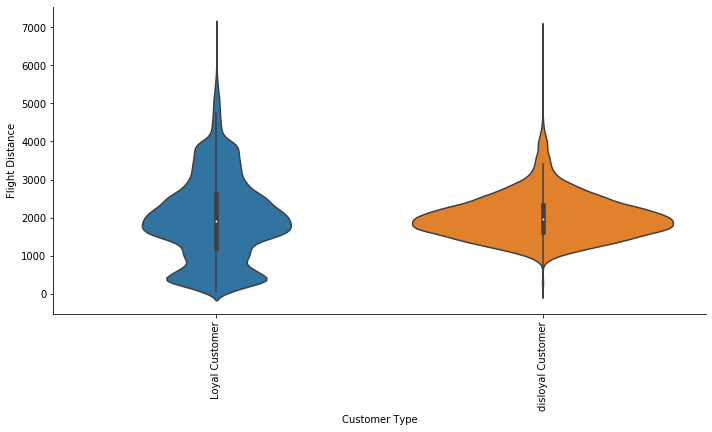

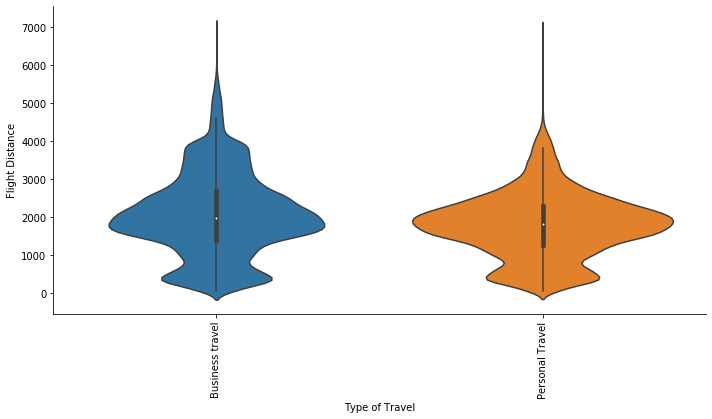

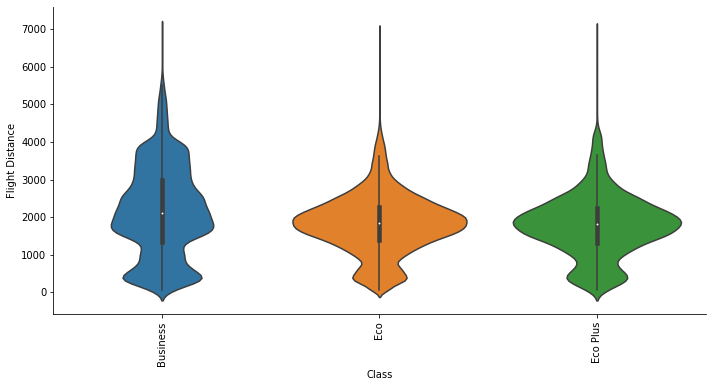

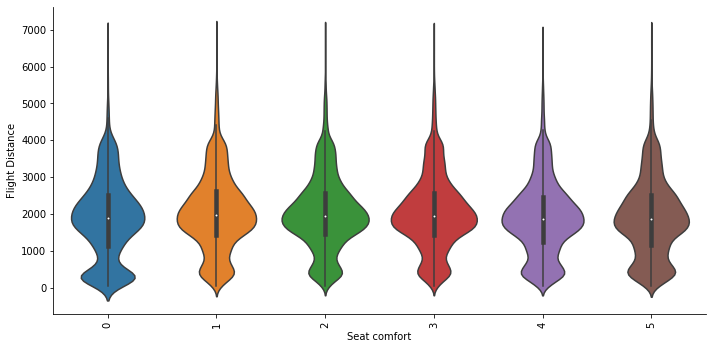

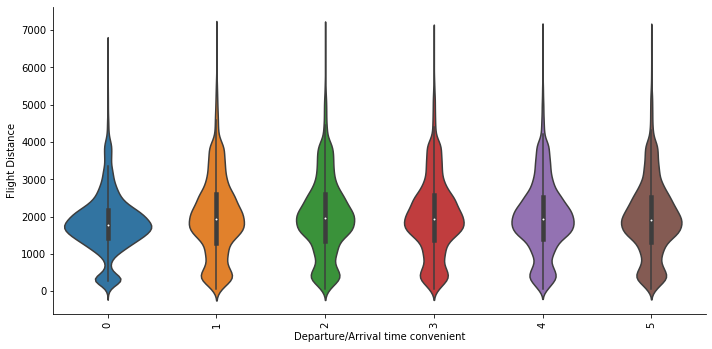

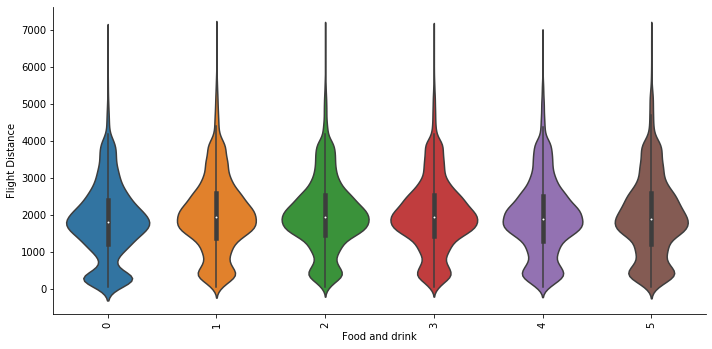

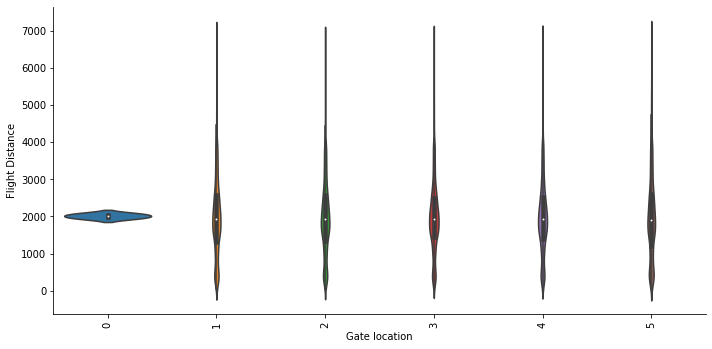

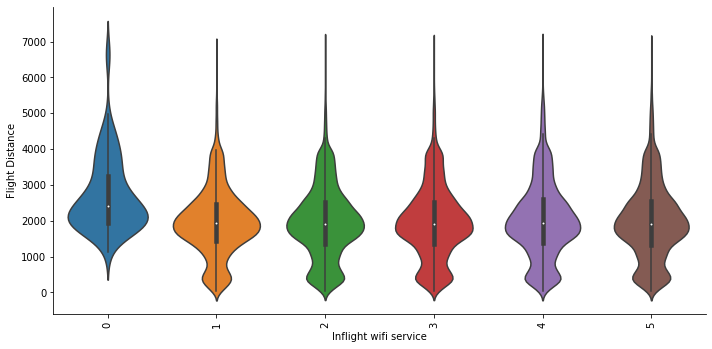

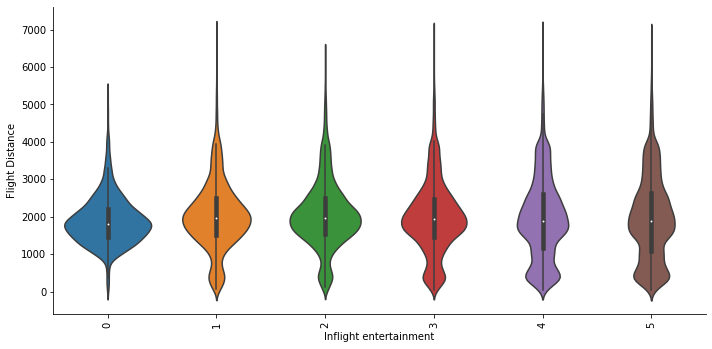

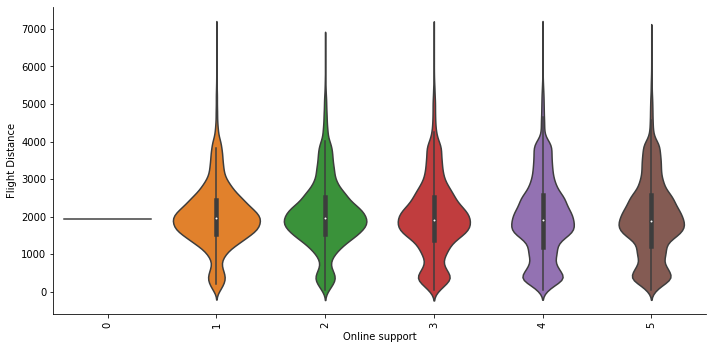

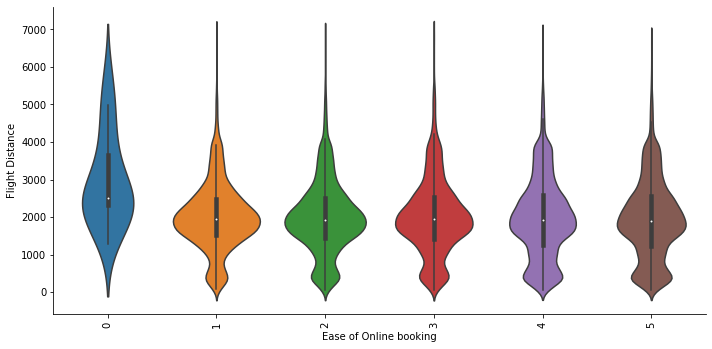

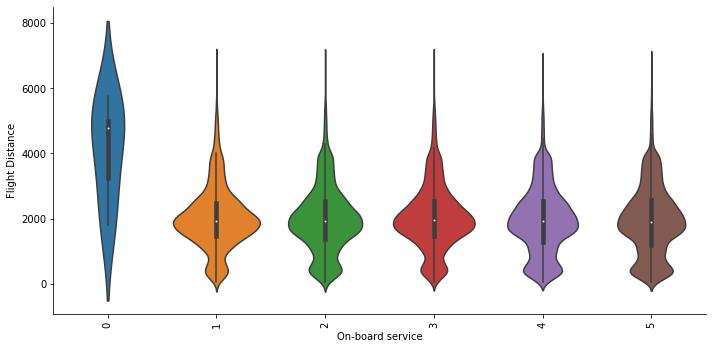

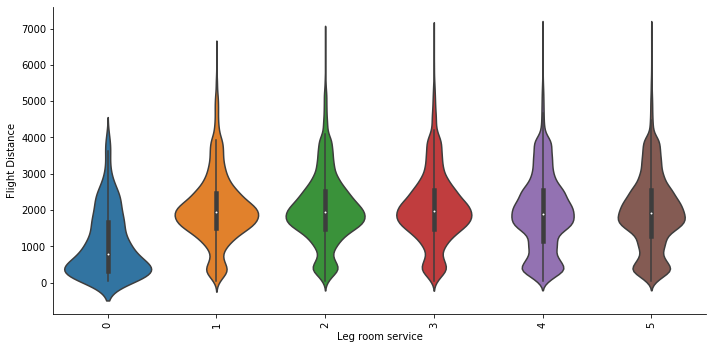

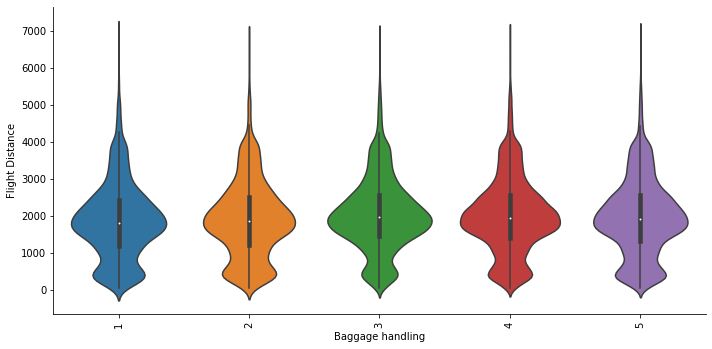

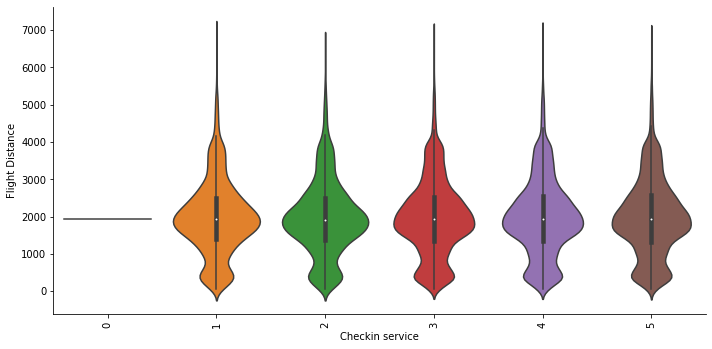

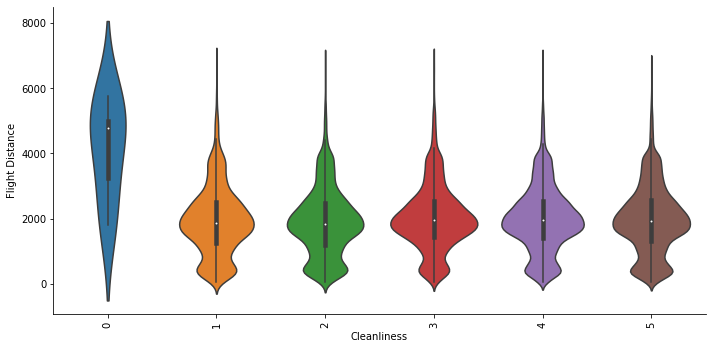

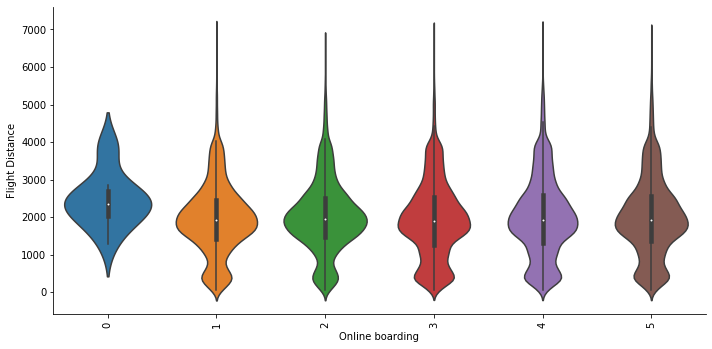

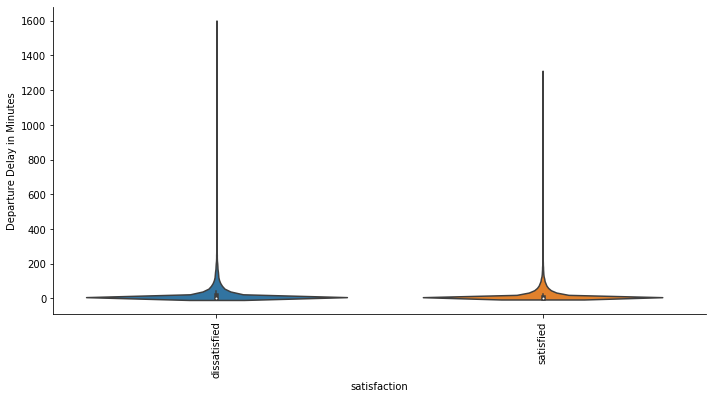

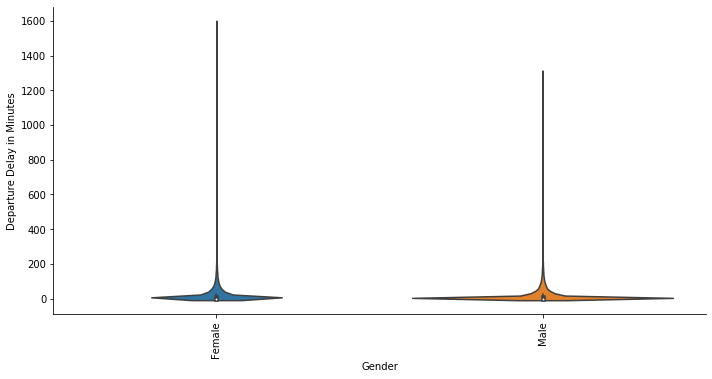

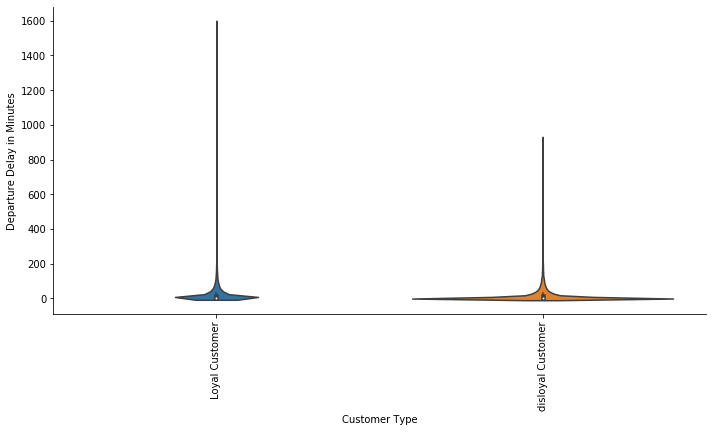

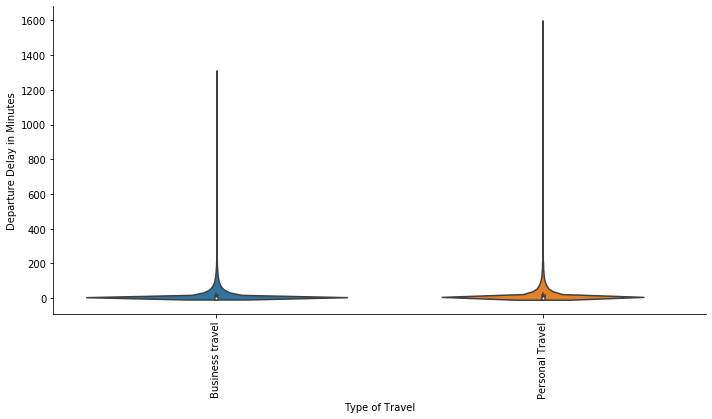

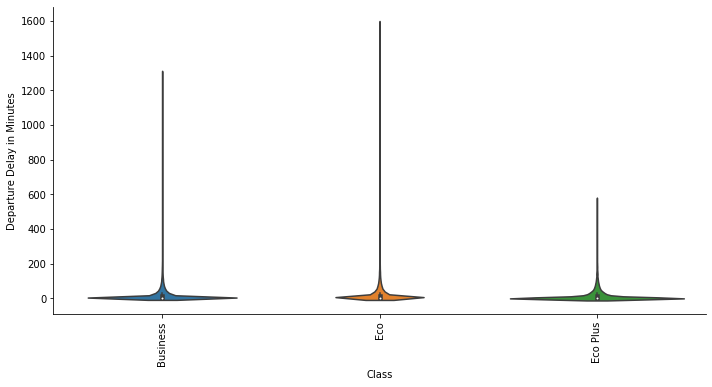

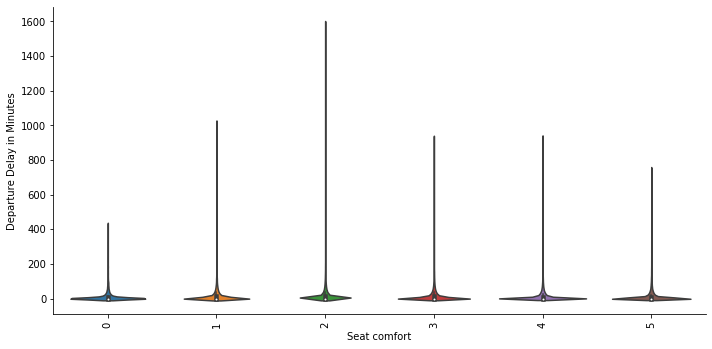

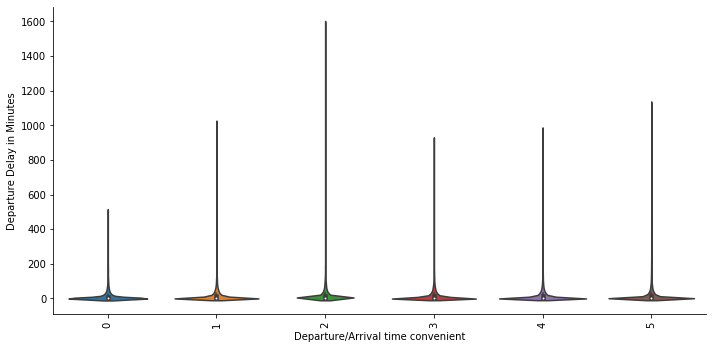

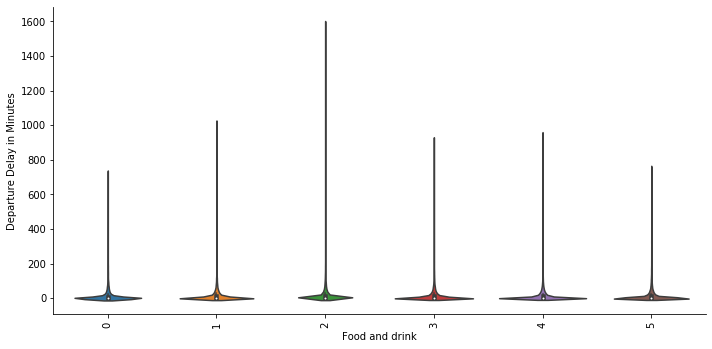

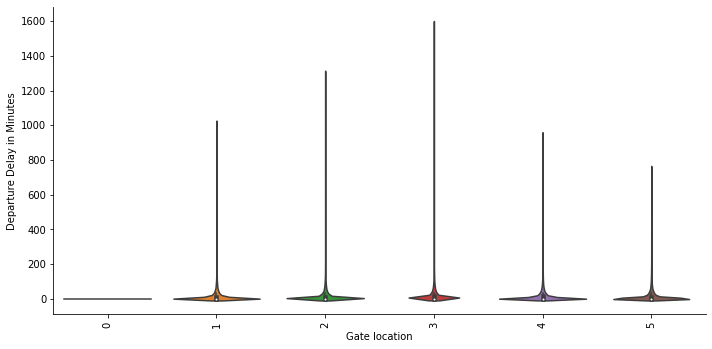

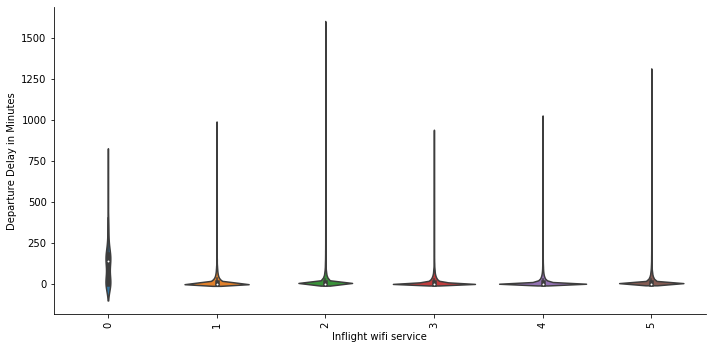

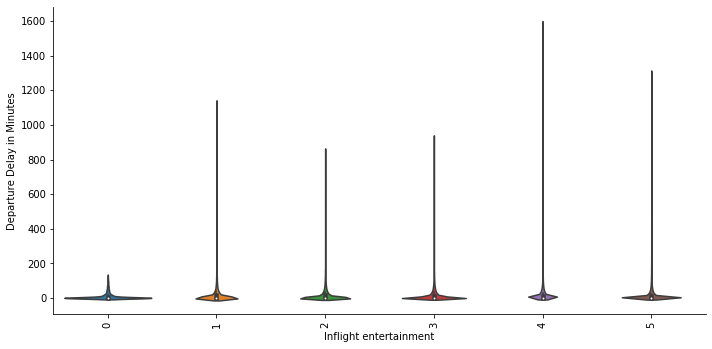

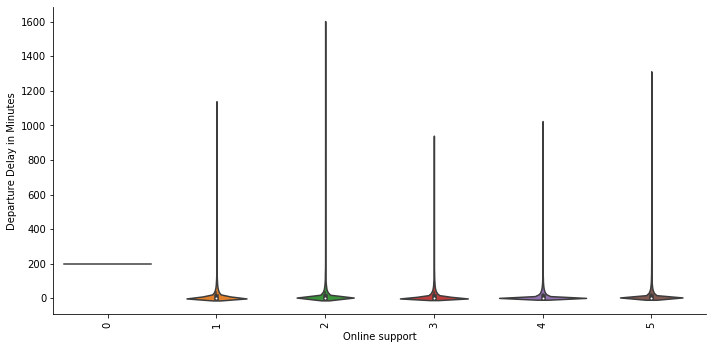

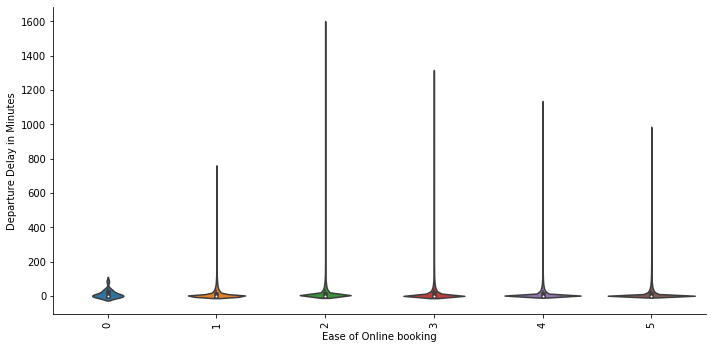

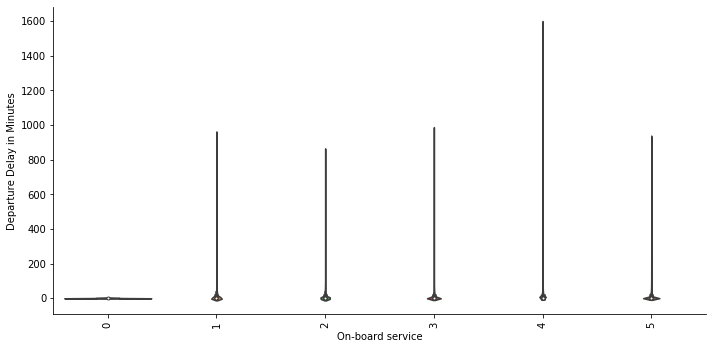

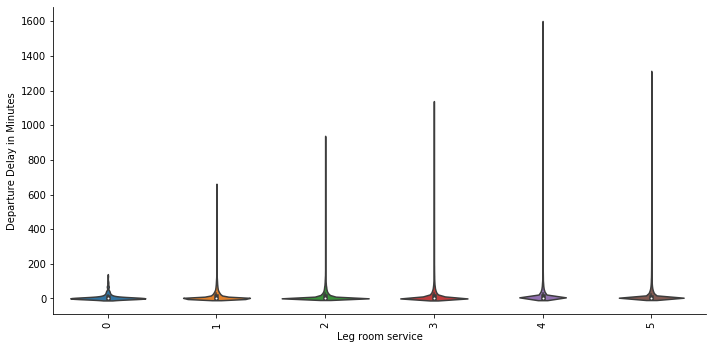

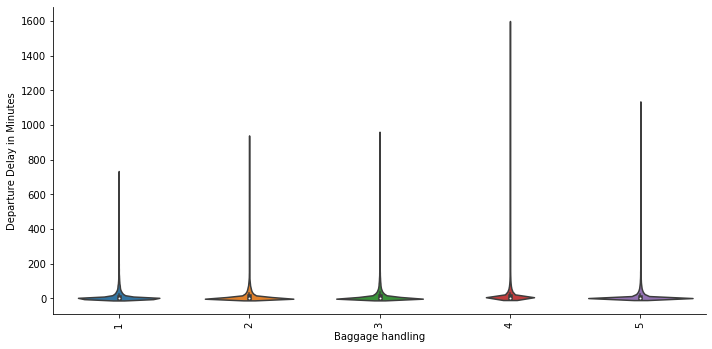

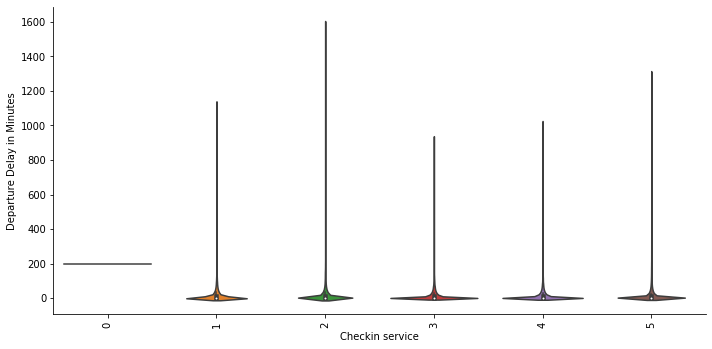

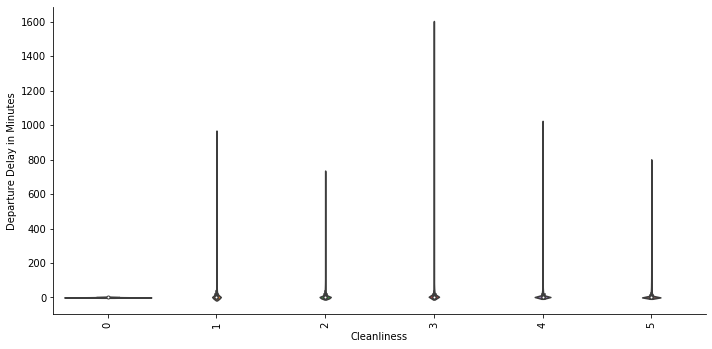

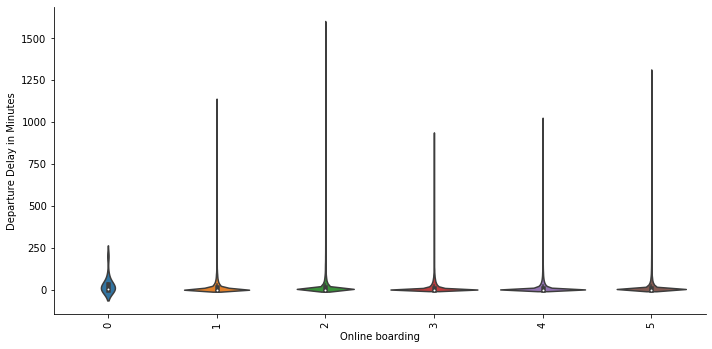

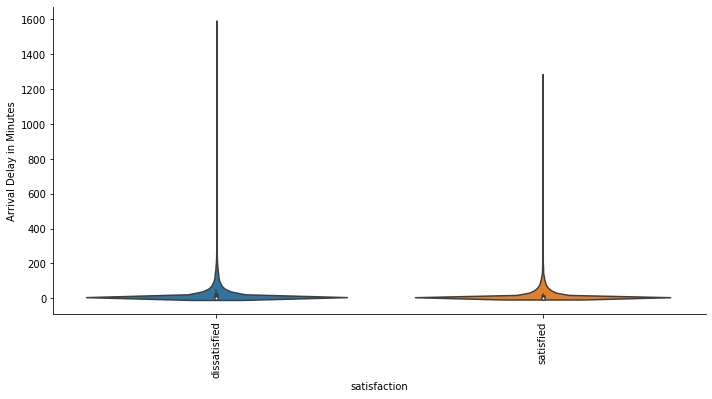

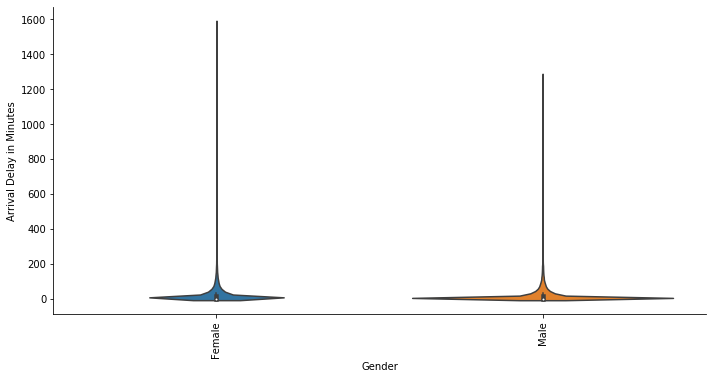

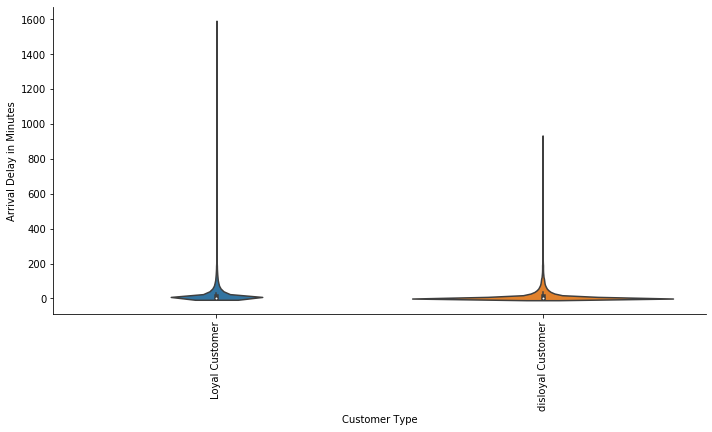

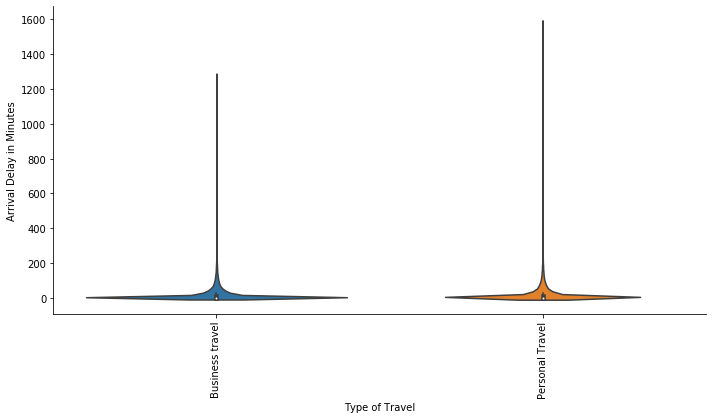

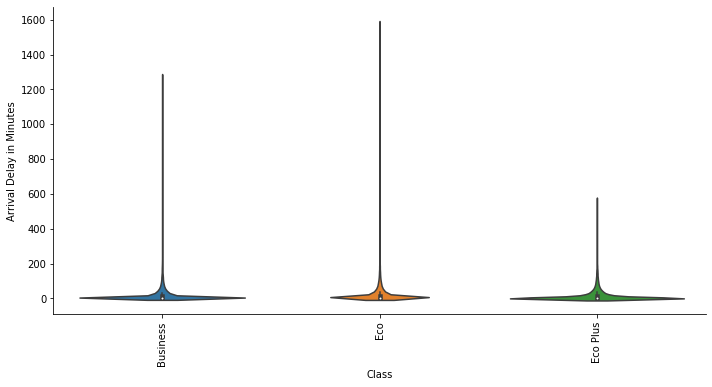

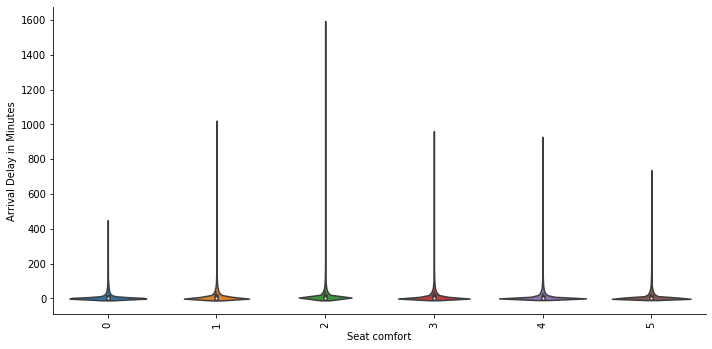

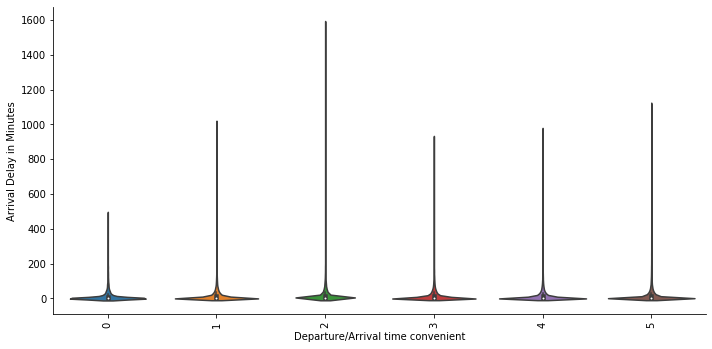

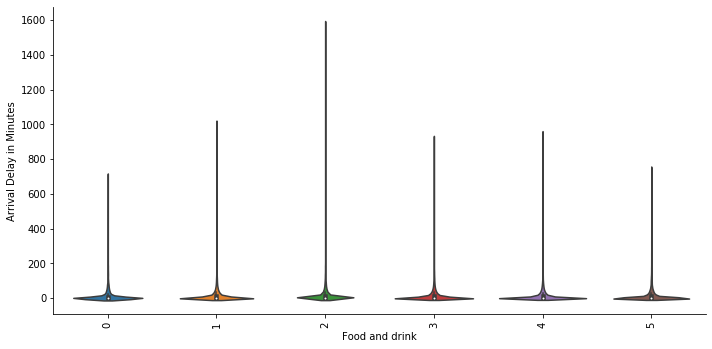

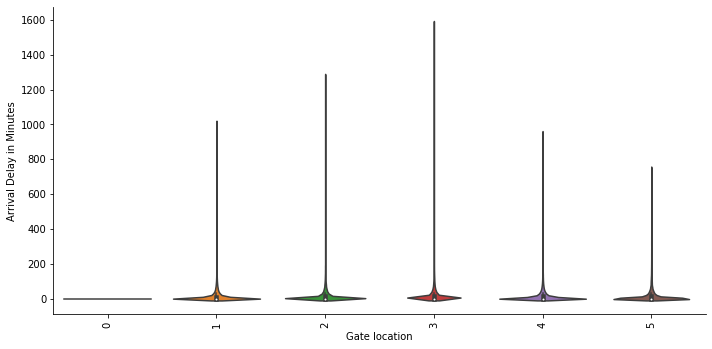

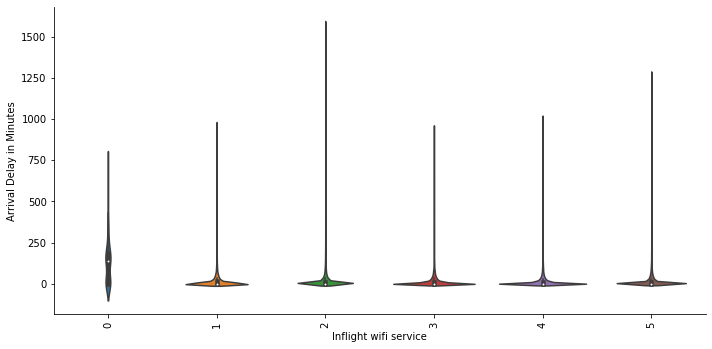

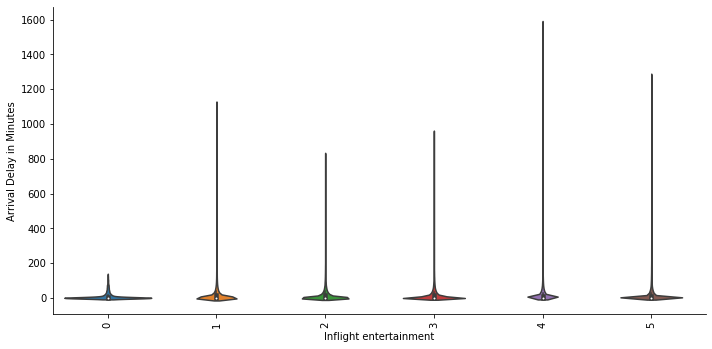

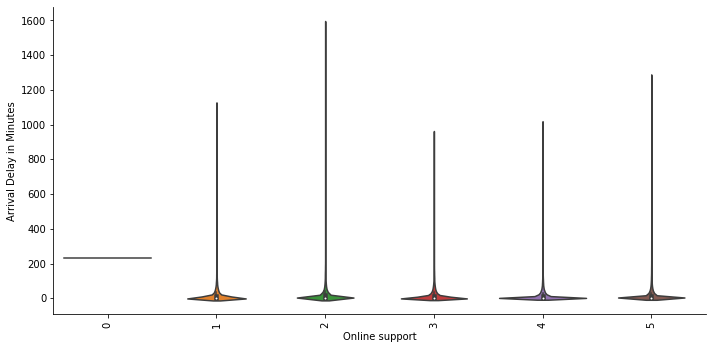

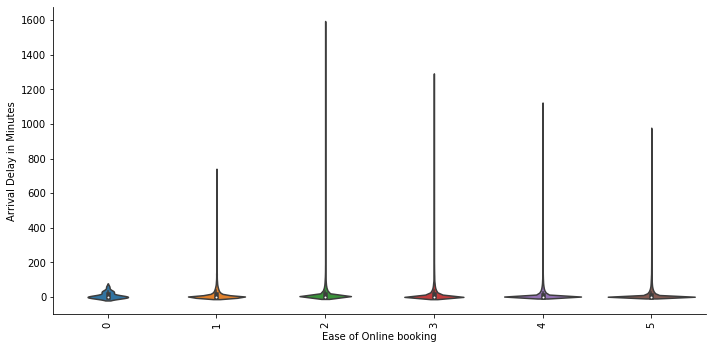

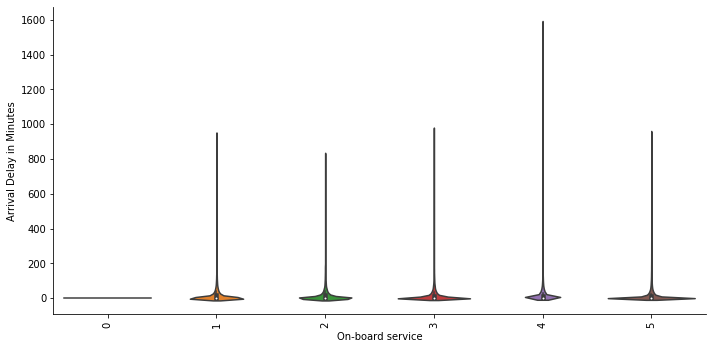

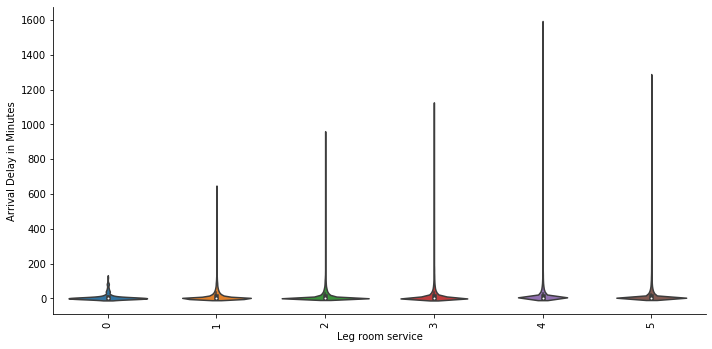

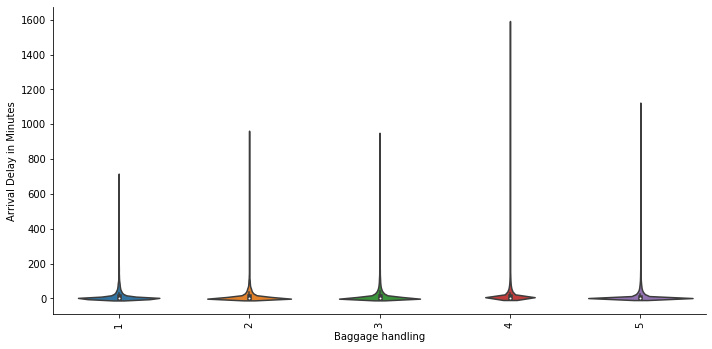

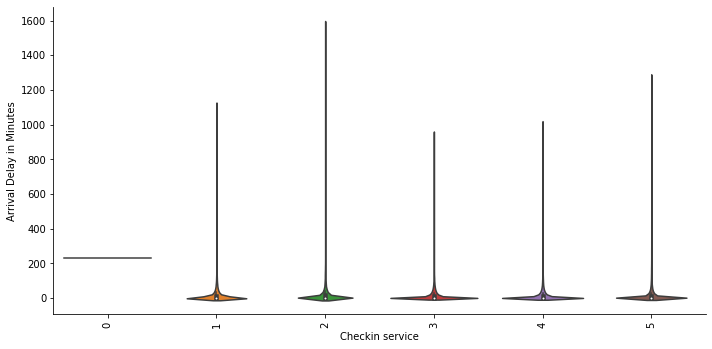

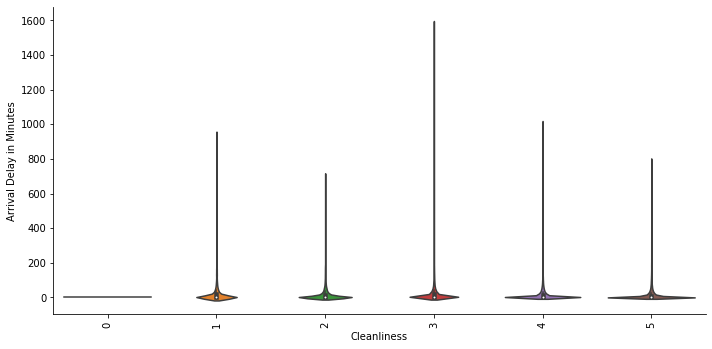

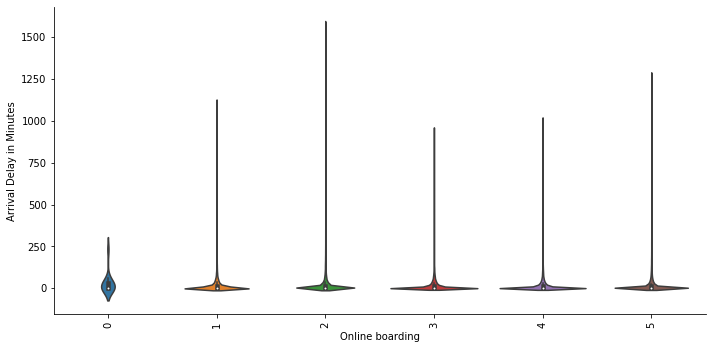


To check pairwise joint distribution of numeric data


C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


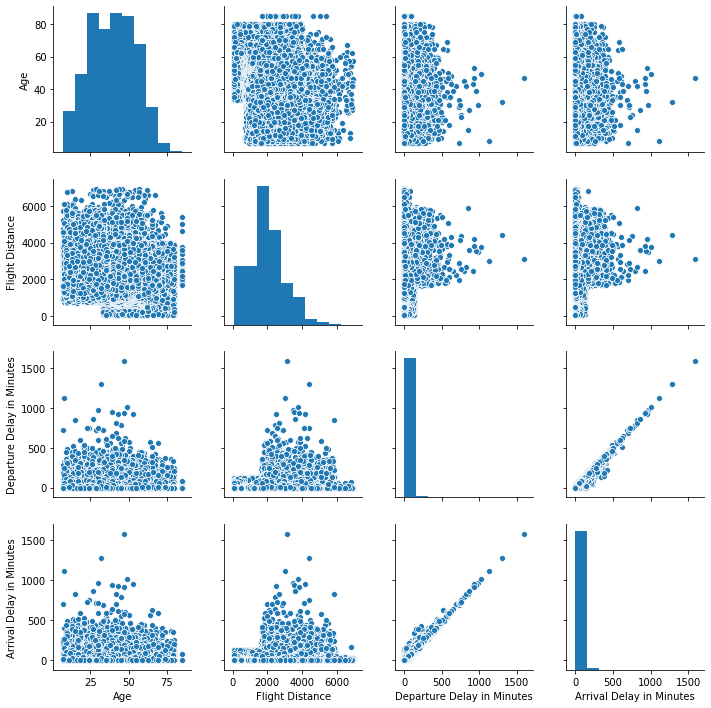


To check time series of numeric data  by daily, monthly and yearly frequency


In [6]:
eda(df)